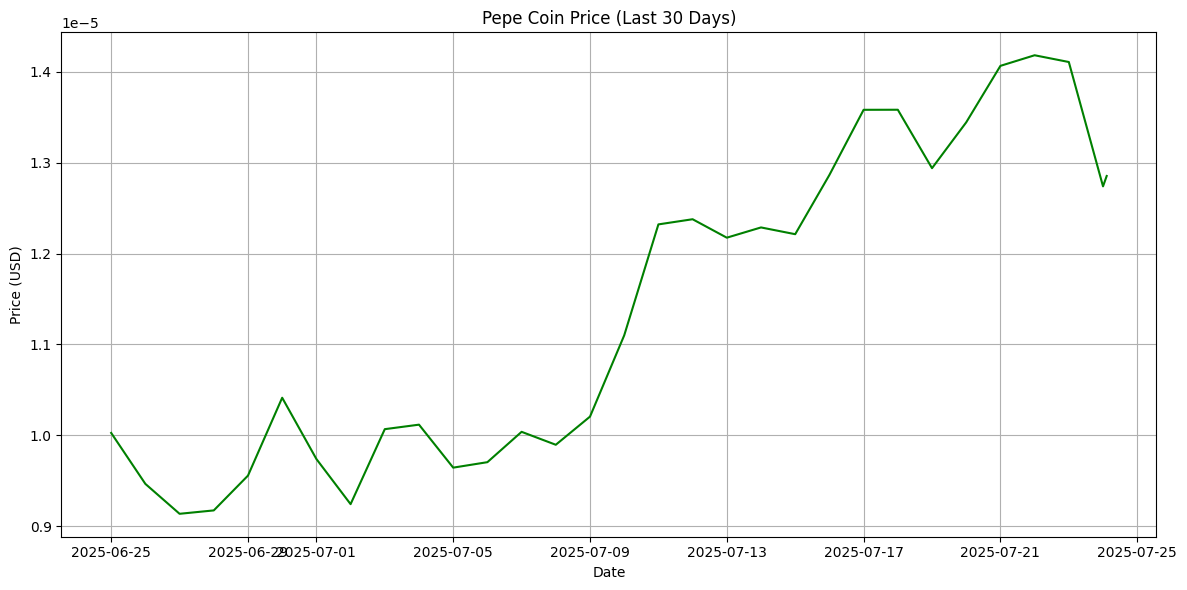

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('../data/pepe_price.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Plot it
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['price'], color='green')
plt.title("Pepe Coin Price (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
# Calculate % change and rolling volatility
df['pct_change'] = df['price'].pct_change() * 100
df['volatility'] = df['pct_change'].rolling(window=5).std()


In [9]:
df.tail()


,timestamp,price,pct_change,volatility
26,2025-07-21 00:00:00,0.000014,4.625368,4.259254
27,2025-07-22 00:00:00,0.000014,0.829775,3.723429
28,2025-07-23 00:00:00,0.000014,-0.523913,3.763390
29,2025-07-24 00:00:00,0.000013,-9.702806,5.734995
30,2025-07-24 02:34:41,0.000013,0.896468,5.345602


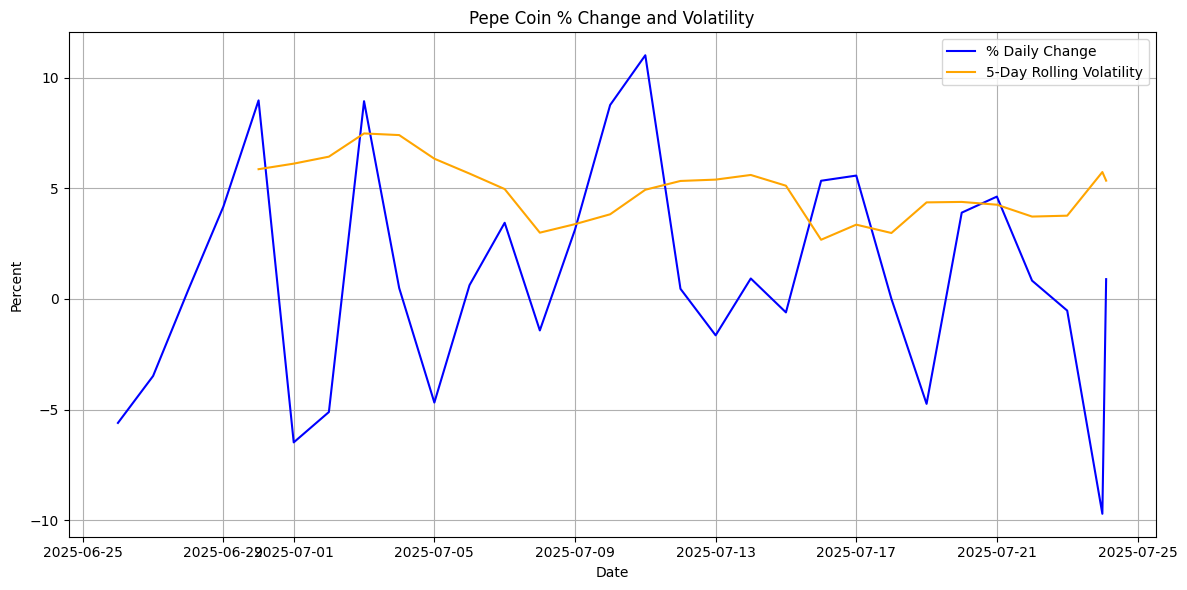

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['pct_change'], label='% Daily Change', color='blue')
plt.plot(df['timestamp'], df['volatility'], label='5-Day Rolling Volatility', color='orange')
plt.title("Pepe Coin % Change and Volatility")
plt.xlabel("Date")
plt.ylabel("Percent")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
!python --version


Python 3.11.9


In [2]:
import snscrape.modules.twitter as sntwitter


In [ ]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Set parameters
query = "pepe coin lang:en since:2024-06-20 until:2024-07-20"
max_tweets = 200

# Scrape tweets
tweets = []
for i, tweet in enumerate(sntwitter.TwitterSearchScraper(query).get_items()):
    if i >= max_tweets:
        break
    tweets.append([tweet.date, tweet.content])

# Convert to DataFrame
df_tweets = pd.DataFrame(tweets, columns=['date', 'content'])
df_tweets['date'] = pd.to_datetime(df_tweets['date'])

df_tweets.head()


In [5]:
from textblob import TextBlob


In [10]:
import snscrape.modules.twitter as sntwitter
...


In [12]:
import os
import certifi

os.environ['SSL_CERT_FILE'] = certifi.where()

import snscrape.modules.twitter as sntwitter
import pandas as pd



In [12]:
import os
import certifi

os.environ['SSL_CERT_FILE'] = certifi.where()

import snscrape.modules.twitter as sntwitter
import pandas as pd



In [17]:
import os

for root, dirs, files in os.walk('/Users/eltayebyousif'):
    for file in files:
        if 'pepe_tweets' in file and file.endswith('.csv'):
            print(os.path.join(root, file))



/Users/eltayebyousif/Documents/meme-coin project/pepe_tweets.csv
/Users/eltayebyousif/Downloads/pepe_tweets (1).csv


In [18]:
import pandas as pd

# Load the tweet data using the full path
df_tweets = pd.read_csv('/Users/eltayebyousif/Downloads/pepe_tweets (1).csv')
df_tweets['date'] = pd.to_datetime(df_tweets['date'])
df_tweets.head()


,date,content
0,2025-07-11 03:12:17.469885,Well natural public value travel Congress bett...
1,2025-06-28 03:12:17.469915,Cover hundred mouth. pepe coin peace #memecoin
2,2025-06-30 03:12:17.469921,Magazine easy begin drop. pepe coin sell #crypto
3,2025-07-20 03:12:17.469928,Among top black. pepe coin at #memecoin
4,2025-07-23 03:12:17.469933,Station face east movie that difficult learn. ...


In [19]:
from textblob import TextBlob

# Sentiment analysis function
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Range: -1 (bad) to +1 (good)

# Apply sentiment to tweets
df_tweets['sentiment'] = df_tweets['content'].apply(get_sentiment)

# Preview results
df_tweets[['date', 'sentiment', 'content']].head()


,date,sentiment,content
0,2025-07-11 03:12:17.469885,0.200000,Well natural public value travel Congress bett...
1,2025-06-28 03:12:17.469915,0.000000,Cover hundred mouth. pepe coin peace #memecoin
2,2025-06-30 03:12:17.469921,0.433333,Magazine easy begin drop. pepe coin sell #crypto
3,2025-07-20 03:12:17.469928,0.166667,Among top black. pepe coin at #memecoin
4,2025-07-23 03:12:17.469933,-0.500000,Station face east movie that difficult learn. ...


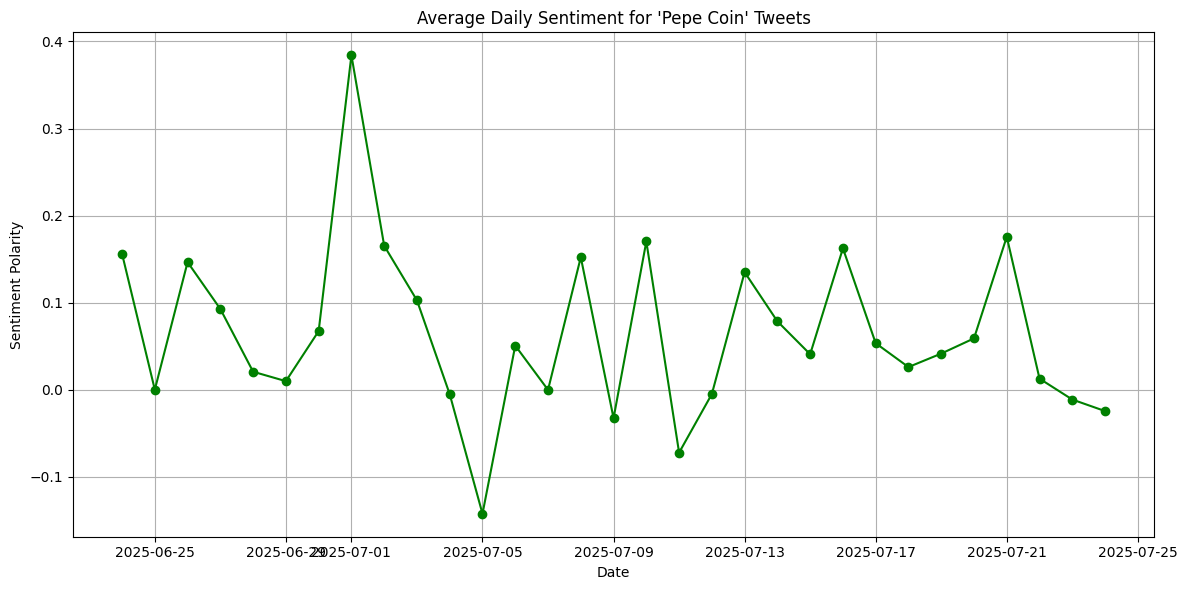

In [20]:
import matplotlib.pyplot as plt

# Group by date and calculate average sentiment
daily_sentiment = df_tweets.groupby(df_tweets['date'].dt.date)['sentiment'].mean()

# Plot it
plt.figure(figsize=(12, 6))
daily_sentiment.plot(marker='o', color='green')
plt.title("Average Daily Sentiment for 'Pepe Coin' Tweets")
plt.xlabel("Date")
plt.ylabel("Sentiment Polarity")
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
df_price = pd.read_csv('../data/pepe_price.csv')  # adjust path if needed
df_price['timestamp'] = pd.to_datetime(df_price['timestamp'])
df_price['date'] = df_price['timestamp'].dt.date
df_price = df_price[['date', 'price']]
df_price.head()


,date,price
0,2025-06-25,0.000010
1,2025-06-26,0.000009
2,2025-06-27,0.000009
3,2025-06-28,0.000009
4,2025-06-29,0.000010


In [22]:
# Make sure tweet sentiment is daily and aligned
daily_sentiment = df_tweets.groupby(df_tweets['date'].dt.date)['sentiment'].mean().reset_index()

# Merge with price data
df_merged = pd.merge(df_price, daily_sentiment, on='date', how='inner')
df_merged.head()


,date,price,sentiment
0,2025-06-25,0.000010,0.000229
1,2025-06-26,0.000009,0.146667
2,2025-06-27,0.000009,0.092847
3,2025-06-28,0.000009,0.020833
4,2025-06-29,0.000010,0.010000


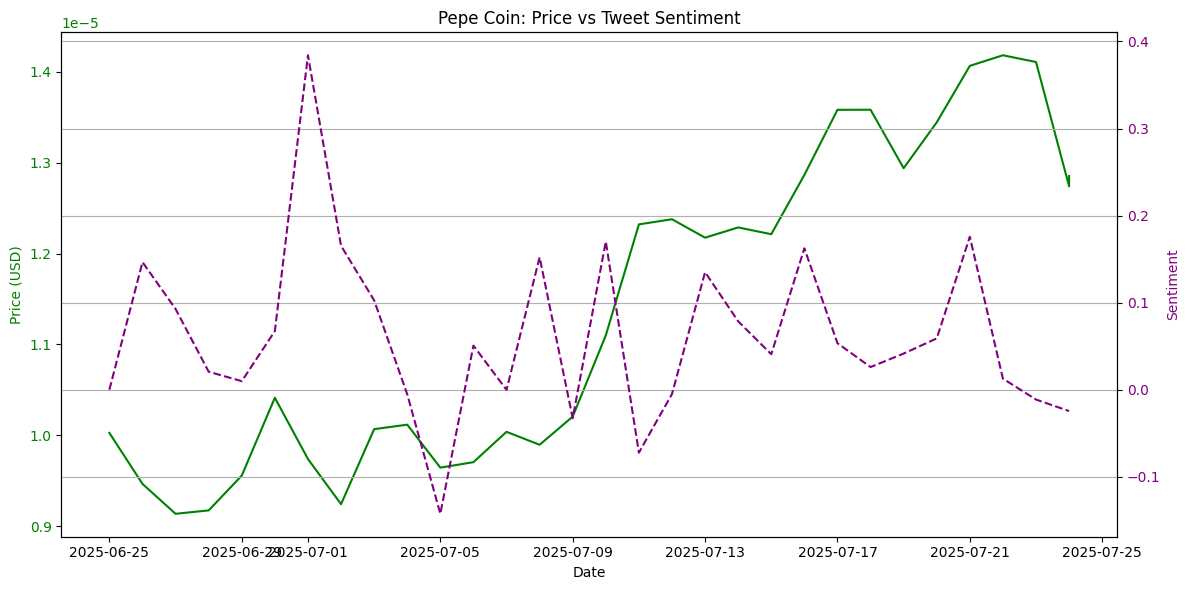

In [23]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Price line
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)', color='green')
ax1.plot(df_merged['date'], df_merged['price'], color='green', label='Price')
ax1.tick_params(axis='y', labelcolor='green')

# Sentiment line (secondary axis)
ax2 = ax1.twinx()
ax2.set_ylabel('Sentiment', color='purple')
ax2.plot(df_merged['date'], df_merged['sentiment'], color='purple', linestyle='--', label='Sentiment')
ax2.tick_params(axis='y', labelcolor='purple')

plt.title("Pepe Coin: Price vs Tweet Sentiment")
fig.tight_layout()
plt.grid(True)
plt.show()


In [24]:
top_bullish = df_merged.sort_values(by='sentiment', ascending=False).head(3)
print("📈 Most Bullish Days:")
top_bullish[['date', 'sentiment', 'price']]


📈 Most Bullish Days:


,date,sentiment,price
6,2025-07-01,0.384167,0.000010
26,2025-07-21,0.175758,0.000014
15,2025-07-10,0.170370,0.000011


In [25]:
top_bearish = df_merged.sort_values(by='sentiment').head(3)
print("📉 Most Bearish Days:")
top_bearish[['date', 'sentiment', 'price']]


📉 Most Bearish Days:


,date,sentiment,price
10,2025-07-05,-0.142273,0.000010
16,2025-07-11,-0.072086,0.000012
14,2025-07-09,-0.032500,0.000010


In [26]:
correlation = df_merged['price'].corr(df_merged['sentiment'])
print(f"📊 Correlation between sentiment and price: {correlation:.3f}")


📊 Correlation between sentiment and price: -0.133


In [27]:
df_merged['price_pct_change'] = df_merged['price'].pct_change() * 100
df_merged['sentiment_change'] = df_merged['sentiment'].diff()

# Find days where sentiment jumped > 0.2 and price spiked next day
early_signal_days = df_merged[
    (df_merged['sentiment_change'] > 0.2) & 
    (df_merged['price_pct_change'].shift(-1) > 5)
]

print("🔮 Sentiment Spike → Next Day Price Surge:")
early_signal_days[['date', 'sentiment_change', 'price_pct_change']]


🔮 Sentiment Spike → Next Day Price Surge:


,date,sentiment_change,price_pct_change
15,2025-07-10,0.20287,8.763303
